### **KLASIFIKASI KANKER PAYUDARA MENGGUNAKAN ALGORITMA NAIVE BAYES**

Nama : Itsnaini Qiwam Robbayani <br>
NIM : 21.11.4141

### 1. Import Library

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

### 2. Load Dataset

In [2]:
# Mengimpor dan menampilkan dataset
df = pd.read_csv('breast_cancer.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
# Menampilkan informasi DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [4]:
# Menampilkan statistik deskriptif
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


### 3. Preprocessing Data

In [5]:
# Mengubah nama kolom dan nama dari klasifikasi agar mudah dimengerti
df.columns = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP', 'Classification']
df['Classification'][df['Classification'] == 1] = 'Healthy'
df['Classification'][df['Classification'] == 2] = 'Breast Cancer'
df

<ipython-input-5-5b0dbce174ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classification'][df['Classification'] == 1] = 'Healthy'


,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Healthy
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Healthy
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Healthy
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Healthy
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Healthy
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,Breast Cancer
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,Breast Cancer
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,Breast Cancer
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,Breast Cancer


In [6]:
# Membagi data menjadi Train Data dan Test Data
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .7
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP,Classification,is_train
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Healthy,True
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Healthy,False
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Healthy,False
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Healthy,True
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Healthy,True
...,...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,Breast Cancer,False
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,Breast Cancer,False
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,Breast Cancer,False
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,Breast Cancer,True


In [7]:
# Membuat dataframe dengan test rows dan training rows
train, test = df[df['is_train'] == True], df[df['is_train']==False]

# Menampilkan jumlah total dari observasi untuk dataframe test dan training
print('Jumlah observasi dalam data training', len(train))
print('Jumlah observasi dalam data test', len(test))

Jumlah observasi dalam data training 74
Jumlah observasi dalam data test 42


### 4. Implementasi Algoritma Naive Bayes

In [8]:
# Memilih fitur yang relevan dan variabel klasifikasi
X = df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP']]
y = df['Classification']

# Membagi data menjadi data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Memilih fitur yang relevan untuk data train
X_train = X_train[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP']]
y_train = y_train

# Memilih fitur yang relevan untuk data test
X_test = X_test[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP']]
y_test = y_test

In [10]:
# Membuat model Naive Bayes
nb = GaussianNB()

# Melatih classifier
nbc = nb.fit(train[df.columns[:9]], train['Classification'])
nbc

GaussianNB()

In [11]:
# Mengaplikasikan classifier yang sudah dilatih kedalam data test
predict_class = nb.predict(test[df.columns[:9]])
predict_class

array(['Healthy', 'Healthy', 'Breast Cancer', 'Healthy', 'Breast Cancer',
       'Healthy', 'Breast Cancer', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Breast Cancer', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Breast Cancer', 'Breast Cancer', 'Healthy',
       'Breast Cancer', 'Healthy', 'Healthy', 'Healthy', 'Healthy',
       'Healthy', 'Healthy', 'Breast Cancer', 'Breast Cancer',
       'Breast Cancer', 'Breast Cancer', 'Breast Cancer', 'Breast Cancer',
       'Breast Cancer', 'Breast Cancer', 'Healthy', 'Healthy', 'Healthy',
       'Breast Cancer', 'Breast Cancer', 'Healthy', 'Healthy', 'Healthy'],
      dtype='<U13')

In [12]:
# Menampilkan probabilitas yang diprediksi
nb.predict_proba(test[df.columns[:9]])

array([[1.46450455e-002, 9.85354955e-001],
       [4.94556128e-003, 9.95054439e-001],
       [8.56072899e-001, 1.43927101e-001],
       [1.31599176e-002, 9.86840082e-001],
       [5.41939678e-001, 4.58060322e-001],
       [7.03618163e-002, 9.29638184e-001],
       [5.92280383e-001, 4.07719617e-001],
       [3.05161871e-002, 9.69483813e-001],
       [7.97947756e-002, 9.20205224e-001],
       [1.73144093e-002, 9.82685591e-001],
       [1.80172839e-002, 9.81982716e-001],
       [1.00000000e+000, 6.44989564e-033],
       [3.17020181e-002, 9.68297982e-001],
       [1.51026317e-001, 8.48973683e-001],
       [4.16243165e-001, 5.83756835e-001],
       [1.50958108e-002, 9.84904189e-001],
       [6.72694018e-001, 3.27305982e-001],
       [9.11380948e-001, 8.86190525e-002],
       [1.03606804e-001, 8.96393196e-001],
       [6.88525743e-001, 3.11474257e-001],
       [1.96742610e-002, 9.80325739e-001],
       [5.52634079e-002, 9.44736592e-001],
       [1.33612337e-002, 9.86638766e-001],
       [1.3

### 5. Uji Model

In [13]:
# Inisialisasi model Naive Bayes
nb_classifier = GaussianNB()

# Melatih model pada data training
nb_classifier.fit(X_train, y_train)

# Melakukan prediksi pada data test
Y_pred = nb_classifier.predict(X_test)

### 6. Akurasi

In [14]:
# Mengukur kinerja model
accuracy = accuracy_score(y_test, Y_pred)
cr = classification_report(y_test, Y_pred)

# Menampilkan hasil
print("Accuracy:", accuracy)
print("\nClassification Report:\n", cr)

Accuracy: 0.75

Classification Report:
                precision    recall  f1-score   support

Breast Cancer       0.88      0.58      0.70        12
      Healthy       0.69      0.92      0.79        12

     accuracy                           0.75        24
    macro avg       0.78      0.75      0.74        24
 weighted avg       0.78      0.75      0.74        24



### 7. Evaluasi Model

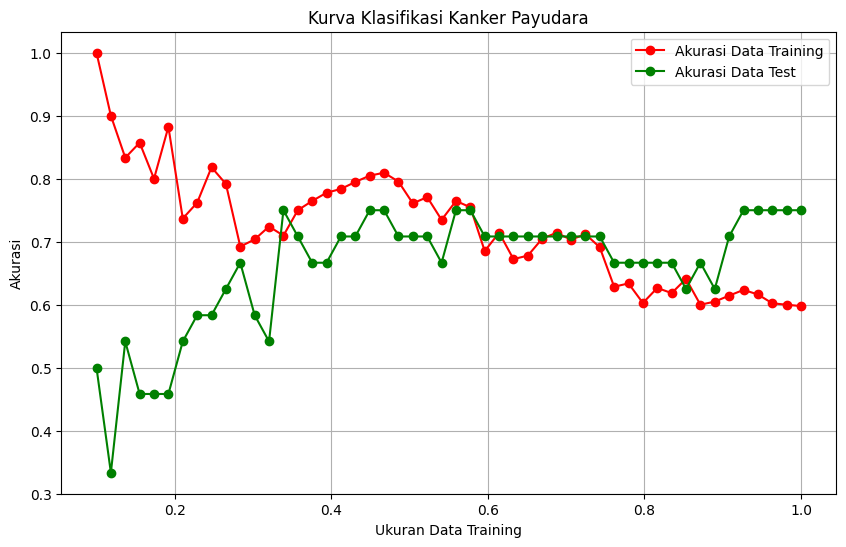

In [15]:
# Digunakan untuk membagi data training menjadi beberapa bagian
train_sizes = np.linspace(0.1, 1, 50)
learning_curve_train = []
learning_curve_test = []
nb = GaussianNB()

# Melakukan iterasi pada berbagai ukuran data training
for train_size in train_sizes:
    num_samples = int(train_size * len(X_train))
    X_subset = X_train[:num_samples]
    Y_subset = y_train[:num_samples]
    nb.fit(X_subset, Y_subset)
    Y_pred_train = nb.predict(X_subset)
    acc_train = accuracy_score(Y_subset, Y_pred_train)
    learning_curve_train.append(acc_train)
    Y_pred_test = nb.predict(X_test)
    acc_test = accuracy_score(y_test, Y_pred_test)
    learning_curve_test.append(acc_test)

# Plot Kurva
plt.figure(figsize=(10, 6))
plt.title('Kurva Klasifikasi Kanker Payudara')
plt.xlabel('Ukuran Data Training')
plt.ylabel('Akurasi')
plt.grid()
plt.plot(train_sizes, learning_curve_train, 'o-', color="r", label="Akurasi Data Training")
plt.plot(train_sizes, learning_curve_test, 'o-', color="g", label="Akurasi Data Test")
plt.legend(loc="best")
plt.show()

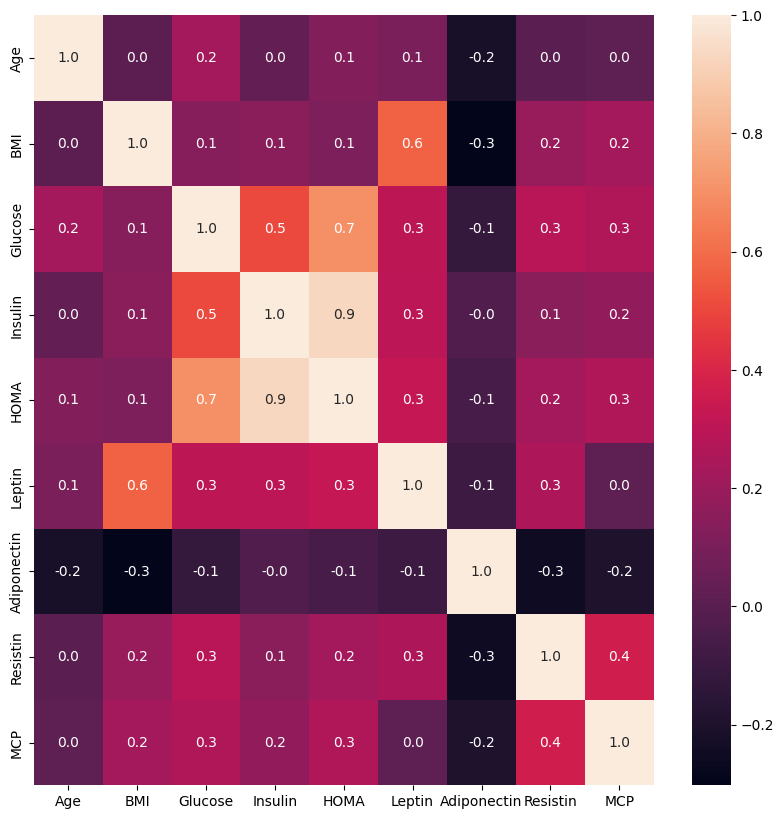

In [16]:
# Melatih model pada data training
nb_classifier.fit(X_train, y_train)

# Menganalisis korelasi
cor = X.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True, fmt='.1f')
plt.show()

### 8. Prediksi Manual

In [17]:
def predict_manual(Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP):
  print('Prediction : ', nb.predict([[Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP]]))
  print('Probability : ', nb.predict_proba([[Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP]]))

In [18]:
predict_manual(69, 21.111111, 81, 3.115, 0.612725, 8.8438, 7.169560, 7.99585, 554.697)

Prediction :  ['Healthy']
Probability :  [[0.09528031 0.90471969]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [19]:
import pickle
filename = 'nb_model.sav'
pickle.dump(nb, open(filename, 'wb'))